In [1]:
# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

import os, sys
from pprint import pprint
sys.path.extend(('../reframe', '..')) # the `modules` package imports `reframe` so need that in sys.modules
import modules

In [2]:
# NB: this is based on paths looking like:
# ../output/alaska/compute-roce/gnu-openmpi/IMB_PingPong/rfm_IMB_PingPong_job.out 
# ../perflogs/alaska/compute-roce/gnu-openmpi/IMB_PingPong/IMB_PingPong.log

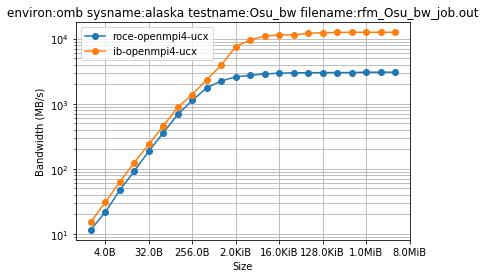

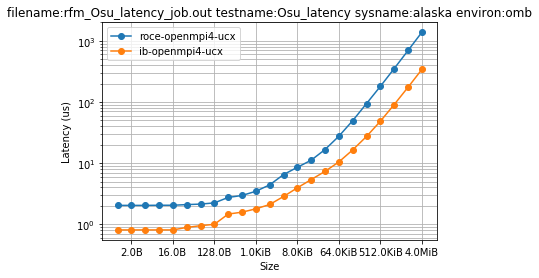

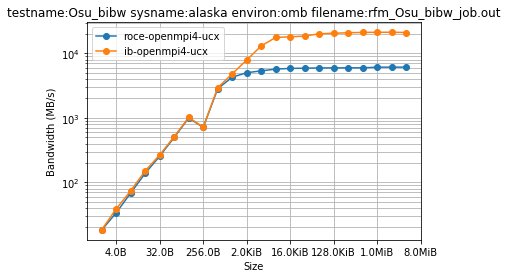

In [51]:
# Message size vs bandwidth/latency for 2-process tests - most-recent runs only:

for test in ['Osu_bw', 'Osu_latency', 'Osu_bibw']:
    
    # find all data and work out differences between them:
    paths = modules.utils.find_run_outputs(root='../output', test=test)
    fig, ax = plt.subplots(nrows=1, ncols=1)
    common, meta_diffs = modules.utils.diff_dicts([modules.utils.parse_path_metadata(p) for p in paths], ignore=['path'])
    
    # load and plot:
    for ix, path in enumerate(paths):
        data = modules.omb.read_omb_out(path)
        label = '-'.join(meta_diffs[ix].values())
        plt.plot(data.columns[0], data.columns[1], 'o-', data=data, label=label)
        
    # format plot:
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=10)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: modules.utils.sizeof_fmt(x)))
    ax.grid(True, which="both")
    ax.set_xlabel(data.columns[0])
    ax.set_ylabel(data.columns[1])
    title = ' '.join(['%s:%s' % (k, v) for (k, v) in common.items()]) # TODO: improve
    ax.set_title(title)
    ax.legend()

loaded 20 performance records


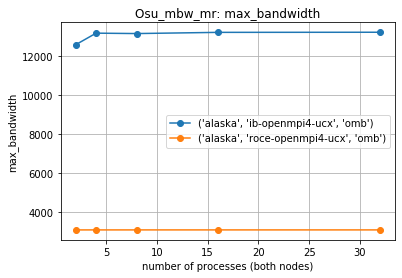

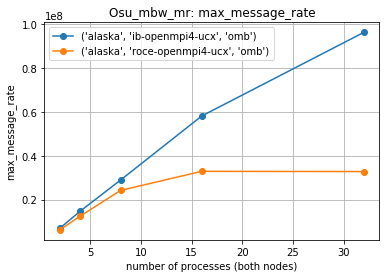

In [3]:
# osu_mbw_mr: max message rate and max bandwidth vs number of processes - most-recent runs

# Load performance records:
perf_records = modules.utils.load_perf_logs('../perflogs', 'Osu_mbw_mr', '.log')
print('loaded %s performance records' % len(perf_records))

# Plot layout:
#   perf-var:
#    xs: n_cores, ys: value, series: system-partition-environment
for perf_var, data in perf_records.groupby('perf_var'):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for spe, data in data.groupby(['sysname', 'partition', 'environ']):
        xs = []
        ys = []
        for test, data in data.groupby('testname'): # NB this won't iterate in number-of-cores order!
            n_procs = int(test.rsplit('_')[-1]) # TODO: be better if we could get this into the perflog tbh
            xs.append(n_procs)
            last_test = data.iloc[-1] # as we know performance logs go forward thro history
            ys.append(last_test['perf_value'])
        # now sort by number of processes:
        xs, ys = zip(*sorted(zip(xs, ys), key=lambda xy: xy[0]))
        plt.plot(xs, ys, 'o-', label=spe)
    ax.set_title('Osu_mbw_mr: %s' % perf_var)
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('number of processes (both nodes)')
    ax.set_ylabel(perf_var)
        

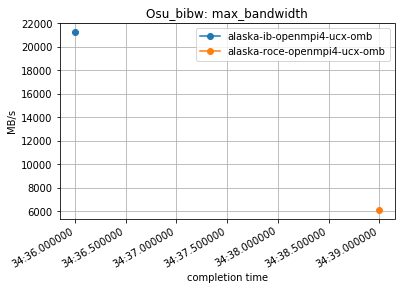

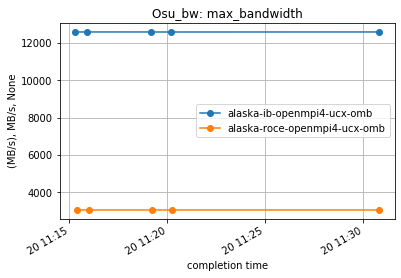

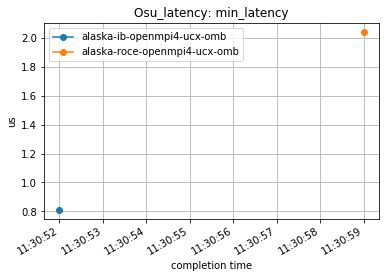

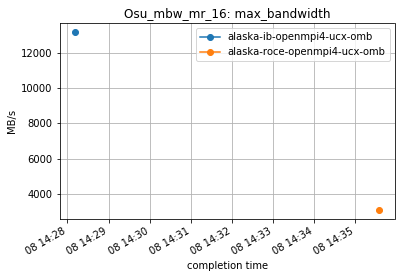

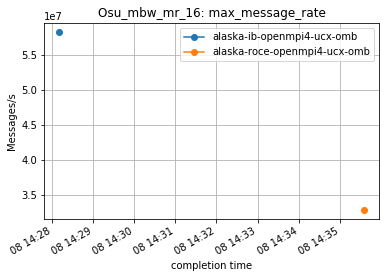

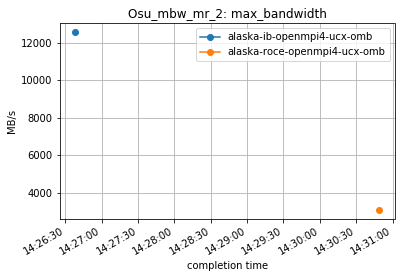

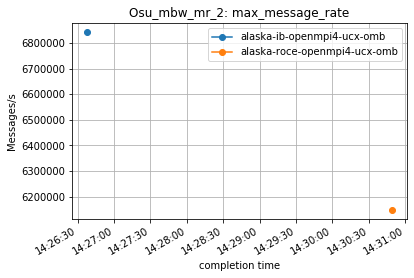

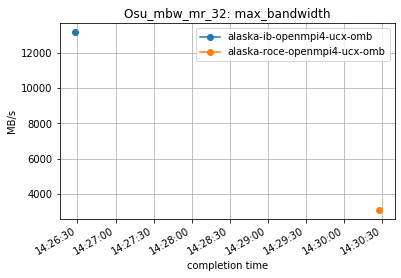

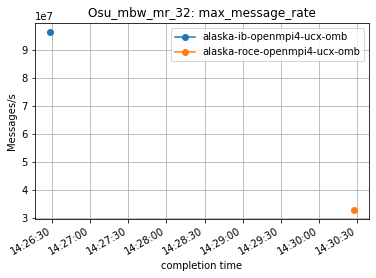

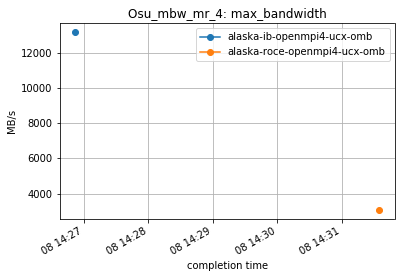

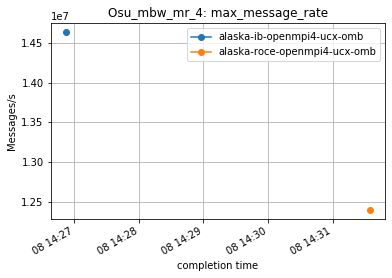

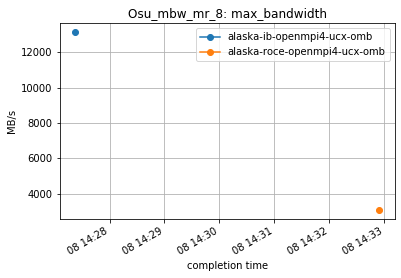

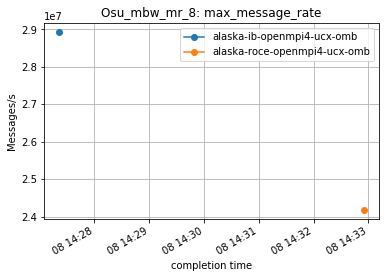

In [53]:
# Historical plots for all performance variables:
perf_records = modules.utils.load_perf_logs('../perflogs', 'Osu_', '.log')
modules.plots.plot_perf_history(perf_records)